# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Ivan Chandra Sutanto
- Email: ivancandracong@gmail.com
- Id Dicoding: 3332

## Menentukan Pertanyaan Bisnis

- Produk apa yang paling laris dan paling sedikit terjual?
- Bagaimana perkembangan penjualan platform E-Commerce sepanjang waktu?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?
- Bagaimana tingkat kepuasan pelanggan terhadap layanan E-Commerce?- Bagaimana profil demografis dan wilayah yang memiliki pelanggan terbanyak?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import matplotlib.image as mpimg
import calendar
import os

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv(os.path.join(".", "data", "customers_dataset.csv"))
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_df = pd.read_csv(os.path.join(".", "data", "geolocation_dataset.csv"))
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items_df = pd.read_csv(os.path.join(".", "data", "order_items_dataset.csv"))
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_df = pd.read_csv(os.path.join(".", "data", "order_payments_dataset.csv"))
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_df = pd.read_csv(os.path.join(".", "data", "order_reviews_dataset.csv"))
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv(os.path.join(".", "data", "orders_dataset.csv"))
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_df = pd.read_csv(os.path.join(".", "data", "product_category_name_translation.csv"))
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_df = pd.read_csv(os.path.join(".", "data", "products_dataset.csv"))
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv(os.path.join(".", "data", "sellers_dataset.csv"))
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [11]:
print('\n', customers_df.info())
print('\n', geolocation_df.info())
print('\n', order_items_df.info())
print('\n', order_payments_df.info())
print('\n', order_reviews_df.info())
print('\n', orders_df.info())
print('\n', product_category_df.info())
print('\n', products_df.info())
print('\n', sellers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non

In [12]:
print('\nInfo data null customers:\n', customers_df.isnull().sum())
print('\nInfo data null geolocation:\n', geolocation_df.isnull().sum())
print('\nInfo data null order items:\n', order_items_df.isnull().sum())
print('\nInfo data null order payments:\n', order_payments_df.isnull().sum())
print('\nInfo data null order reviews:\n', order_reviews_df.isnull().sum())
print('\nInfo data null orders:\n', orders_df.isnull().sum())
print('\nInfo data null product category:\n', product_category_df.isnull().sum())
print('\nInfo data null products:\n', products_df.isnull().sum())
print('\nInfo data null sellers:\n', sellers_df.isnull().sum())


Info data null customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Info data null geolocation:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Info data null order items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Info data null order payments:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Info data null order reviews:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_cre

In [13]:
print('Info data duplikat customers:', customers_df.duplicated().sum())
print('Info data duplikat geolocation:', geolocation_df.duplicated().sum())
print('Info data duplikat order items:', order_items_df.duplicated().sum())
print('Info data duplikat order payments:', order_payments_df.duplicated().sum())
print('Info data duplikat order reviews:', order_reviews_df.duplicated().sum())
print('Info data duplikat orders:', orders_df.duplicated().sum())
print('Info data duplikat product category:', product_category_df.duplicated().sum())
print('Info data duplikat products:', products_df.duplicated().sum())
print('Info data duplikat sellers:', sellers_df.duplicated().sum())

Info data duplikat customers: 0
Info data duplikat geolocation: 261831
Info data duplikat order items: 0
Info data duplikat order payments: 0
Info data duplikat order reviews: 0
Info data duplikat orders: 0
Info data duplikat product category: 0
Info data duplikat products: 0
Info data duplikat sellers: 0


In [14]:
print('\nData describe customers:\n', customers_df.describe(include='all'))
print('\nData describe geolocation:\n', geolocation_df.describe(include='all'))
print('\nData describe order items:\n', order_items_df.describe(include='all'))
print('\nData describe order payments:\n', order_payments_df.describe(include='all'))
print('\nData describe order reviews:\n', order_reviews_df.describe(include='all'))
print('\nData describe orders:\n', orders_df.describe(include='all'))
print('\nData describe product category:\n', product_category_df.describe(include='all'))
print('\nData describe products:\n', products_df.describe(include='all'))
print('\nData describe sellers:\n', sellers_df.describe(include='all'))


Data describe customers:
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix cus

### Cleaning Data

In [15]:
# melihat data yang mengandung missing value pada data csv order_reviews di column review_comment_title
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [16]:
# mengidentifikasi nilai yang dominan sebagai pengganti missing value tersebut.
order_reviews_df.review_comment_title.value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: count, Length: 4527, dtype: int64

In [17]:
# melihat data yang mengandung missing value pada dataframe order_reviews di column review_comment_title
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [18]:
# mengidentifikasi nilai yang dominan sebagai pengganti missing value tersebut.
order_reviews_df.review_comment_message.value_counts()

review_comment_message
Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                            

In [19]:
# berikan nilai "no comment" pada semua data yang kosong, khususnya pada column review_comment_title dan review_comment_message
order_reviews_df.fillna(value="no comment", inplace=True)

In [20]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [21]:
# mengonversi kolom shipping_limit_date dalam DataFrame order_items_df menjadi tipe data datetime
dt_order_items = ["shipping_limit_date"]
 
for column in dt_order_items:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [22]:
# mengonversi kolom review_creation_date, dan review_answer_timestamp dalam DataFrame order_reviews_df menjadi tipe data datetime
dt_order_reviews = ["review_creation_date","review_answer_timestamp"]
 
for column in dt_order_reviews:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [23]:
# mengonversi kolom order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date , dan order_estimated_delivery_date dalam DataFrame orders_df menjadi tipe data datetime
dt_orders = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
 
for column in dt_orders:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [24]:
# Cek Tipe data
print(order_items_df.info())
print(order_reviews_df.info())
print(orders_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object

## Exploratory Data Analysis (EDA)

### Explore customers_df

In [25]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
2602,3943ab310b409df9d58ab083922f6382,457cdfab71a4eb8f8b5956ebcb14d42f,64052,teresina,PI
7162,f4f26be1188a8977388672a08eabacbf,9a6cc6130f9a98cd08456a26fd5624c5,80610,curitiba,PR
38243,d09d644ae171858274e3c166df961b4c,fb3d2759405ec9a4a3e8eb61653a0bec,72005,brasilia,DF
87545,7a83a95f0d08cc419552f5ec647db491,5dd8aa781248cc4d29f0ebe4d41ff0cd,8230,sao paulo,SP
82051,5da810af4515e4470379a90fcf246a15,83e7958a94bd7f74a9414d8782f87628,80030,curitiba,PR


In [26]:
# ringkasan statistik dari DataFrame customers_df
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [27]:
# cek nilai pada kolom customer_id pada dataframe customers_df apakah memiliki nilai unik
customers_df.customer_id.is_unique

True

In [28]:
# cek nilai pada kolom customer_id pada dataframe customers_df apakah memiliki nilai duplikat
customers_df.customer_id.duplicated().sum()

0

In [29]:
# jumlah pelanggan unik untuk setiap kota dalam DataFrame customers_df
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [30]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore order_payments_df

In [31]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
2485,36f3a1a2733d64350c4532c5cd77bdc8,1,credit_card,1,82.90
67427,5d103f49c32225c353410679f8e90880,1,credit_card,4,81.60
27931,c0fb1f0e7d72b79458a1e6a9b8165488,1,credit_card,5,164.79
88261,1223c56f3b550439e13b563ac0ae0d98,1,boleto,1,117.94
67740,b2b22e6b8ad71ac3e8d2242b8f49c910,1,credit_card,1,84.44


In [32]:
# ringkasan statistik dari DataFrame order_payments_df
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [33]:
# jumlah tipe pembayaran dalam DataFrame order_payments_df
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

### Explore orders_df

In [34]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
84034,381079cb5df71e26be946a6704990d55,7b6894ed690ada31d57a4c6e81edd7c1,delivered,2018-02-12 13:21:59,2018-02-12 13:30:44,2018-02-21 15:38:42,2018-03-07 21:42:45,2018-03-12
18799,67119966e190b3d2f210b4f9117395f1,dc88964a1e5894c245746322038bcc5e,delivered,2018-06-28 21:40:14,2018-06-28 21:51:10,2018-06-29 14:19:00,2018-07-04 19:08:28,2018-08-01
9652,ea1c943b92b11b5d15ba43481b4e3ab8,bc4317b200fdce5449bf64bfb17cdcf7,delivered,2018-05-15 12:10:21,2018-05-15 14:35:08,2018-05-15 13:49:00,2018-05-21 20:36:49,2018-06-01
83907,bb5247b3ad417db4b026c3d57e458a46,d71491ab8f43d315aa8efa10a1dde339,delivered,2018-08-13 10:48:58,2018-08-13 11:04:25,2018-08-13 13:07:00,2018-08-22 19:28:55,2018-09-13
27038,34aed6e4313d7573b0d3b459f3a805ea,7afdb6b1737919a448daeb749ee49758,delivered,2017-10-31 18:50:36,2017-11-01 07:06:26,2017-11-03 20:52:14,2017-11-14 21:54:08,2017-11-27


In [35]:
#  menghitung waktu pengiriman (delivery time) suatu pesanan dari pihak pengangkutan (carrier) ke pelanggan dalam satuan hari
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [36]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
98289,1ffd4db85f221566495dd4bf427e3137,7cbb47ab67fb071367951c3007ceedb8,delivered,2017-11-23 17:46:00,2017-11-23 18:55:36,2017-11-27 19:42:16,2017-12-06 18:16:56,2017-12-18,9.0
69403,a96d3bc5d1e3315554ccd38f27ff5ef3,8aa26613f99b460c27155238fd55ec7e,delivered,2018-07-25 20:21:01,2018-07-26 20:15:12,2018-07-27 13:54:00,2018-08-06 15:54:36,2018-08-20,10.0
78923,dbc337fe795b89d0a42fed65a448b964,7eb04a79ce864d7e123251dba21c1fa8,delivered,2017-08-24 07:48:11,2017-08-25 03:03:57,2017-08-25 18:29:55,2017-08-30 19:22:17,2017-09-14,5.0
80168,4950976b463f24286a8eb3f80a2de8dc,9806e34efdf047eb4175288ac54ec96c,delivered,2017-12-09 16:06:45,2017-12-09 16:14:22,2017-12-11 18:12:38,2017-12-27 18:33:06,2018-01-11,16.0
36931,ca4ba0b98a93b132627b97a29c658637,16113da7eb5959b1085b146216d09bca,delivered,2018-03-25 23:15:31,2018-03-25 23:30:23,2018-03-27 14:24:50,2018-05-08 13:46:53,2018-05-02,42.0


In [37]:
orders_df.groupby(by=["order_status"]).order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

In [38]:
# mencari status pelanggan untuk dataframe customers_df berdasarkan transaksi yang pernah dilakukan pada dataframe orders_df

# mengatur status awal untuk semua baris di DataFrame customers_df sebagai 'Non Active'.
customers_df['status'] = 'Non Active'

# mengubah status menjadi 'Active' hanya untuk baris-baris di customers_df di mana customer_id ada di dalam kolom customer_id dari DataFrame orders_df.
customers_df.loc[customers_df['customer_id'].isin(orders_df['customer_id'].values), 'status'] = 'Active'

In [39]:
customers_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
40282,d4f7e997120818cc9db564b522ba2a80,a12085be691be9de5cb0099a94c61e1f,37713,pocos de caldas,MG,Active
80617,6dea049b02f7cdcb440de78b7d4d5883,26728fb51596755c923c21f756fcd11c,19160,alvares machado,SP,Active
36961,2b66ac287e47972e1c8ca427aaef1270,c49b2b621213601a30f6d8a12c03534a,98400,frederico westphalen,RS,Active
45044,f2760a5f7548e1db17a8045cf6caad9e,13cdb19159111a28a057191f5f28d7d6,13205,jundiai,SP,Active
12937,5d6d4a900e250bbef1deb1167433fbfc,76a642a5f1a0134a2bbbb05089a64c41,69042,manaus,AM,Active
82910,c6cfaa95f28c055677c5a0a114f03b33,d759dbfdebbd3ce9d7d28f6f383105e2,86050,londrina,PR,Active
72812,f94b96a35f591b64bb724774dc3754b6,ab6897ef317c88185bf8c0dad781d18c,3755,sao paulo,SP,Active
18081,377796a47a051edd1c8974f1d78e0d8b,3011261e6cf3270a18d07848f64d924f,9580,sao caetano do sul,SP,Active
34205,5810a0308b9152a83b96ec38ad7a7012,c064f509284c8f9b49ef4410509de8b1,22470,rio de janeiro,RJ,Active
64697,4446b2ccb30c1208716a36fb0703a540,62e4743e0989ccae8320767889e71aa9,30626,belo horizonte,MG,Active


In [40]:
customers_df.groupby(by="status").customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

### Explore customers_df & orders_df
#### Merge customers_df & orders_df

In [41]:
customers_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
79391,72fcbb1145f2889eddcba6d6c1d6c090,0408706c63edeca6b44b24f6f077aa47,83602,campo largo,PR,Active,74e033208dc13a7b8127eb8e73d09b76,delivered,2018-05-02 10:48:44,2018-05-02 11:13:45,2018-05-02 09:49:00,2018-05-07 23:06:36,2018-05-29,6.0
90449,62c2c4e5b154ee57a365a112c97f9a65,91f25947ab5a08aed3536392971bb7bb,29170,serra,ES,Active,415c757c7bfdcb97055fb594b1672748,delivered,2017-11-25 15:20:38,2017-11-25 15:34:42,2017-11-27 18:40:00,2017-11-29 04:43:34,2017-12-12,1.0
61861,bb502d133f78d9a41c6f118585010147,fcc75b6c451d8ddf8a3ecbf3bea3dc10,20710,rio de janeiro,RJ,Active,ebdb644689d34624ae893cfe690e6734,delivered,2018-06-12 19:49:38,2018-06-13 07:13:02,2018-06-13 13:51:00,2018-06-21 19:12:48,2018-07-24,8.0
71677,d47e69f46624eccc55b349af80fc4c53,3377cc8994bab907b65292c92f06dcba,53625,igarassu,PE,Active,82daccb8bfc3bb76bc1616a4f22c3cb1,delivered,2017-11-22 23:26:12,2017-11-25 01:57:37,2017-11-27 21:48:41,2017-12-12 15:27:08,2017-12-22,15.0
74563,80a56c8941df38a1adeaf9183c112609,73afbfa86a7c0868c8d58efe0bdaf9aa,99070,passo fundo,RS,Active,e871719502deacb16343832ef4623a07,delivered,2017-06-27 22:45:09,2017-06-27 23:04:32,2017-06-28 10:21:32,2017-07-12 20:04:35,2017-07-19,14.0
10971,1207f9024cf3352f0bb86cc319cb2ced,b720bceb1eead5e8409eeed32732ea49,74310,goiania,GO,Active,6f45fec2b3df1efa2877044cda7a6143,delivered,2018-03-14 11:34:41,2018-03-14 12:08:56,2018-03-15 16:28:22,2018-04-06 23:19:18,2018-04-04,22.0
64012,fadbb3709178fc513abc1b2670aa1ad2,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,Active,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,2018-05-16 20:48:37,2018-05-21,5.0
68602,608d232311554f84a24cbe6ccc3dbab8,0825dca27a94ec57277c16731af8163f,4563,sao paulo,SP,Active,be48bdef069ed1eb0d320bfe65d26351,delivered,2017-12-02 19:41:11,2017-12-02 19:53:44,2017-12-05 14:59:29,2017-12-10 12:19:04,2017-12-27,5.0
81003,9e17dac452c8ff31056ceb4e669a9aac,3d6a13a1aa18fe9eb1ca966388a67ce8,86990,marialva,PR,Active,d8c8bece281c5226428ab03f72ae8416,delivered,2018-08-12 18:19:12,2018-08-14 04:44:19,2018-08-14 17:01:00,2018-08-16 18:03:46,2018-08-28,2.0
91402,02f3bf54b6d382c1726e1c8f1b8f9a9a,97c6ed7adfd133a0331811f8ec165fea,15868,termas de ibira,SP,Active,8ee667e6f4ac4034b939b09c26f1ce2e,delivered,2017-11-13 10:23:44,2017-11-13 10:35:25,2017-11-14 15:56:28,2017-11-28 16:36:01,2017-12-14,14.0


In [42]:
# daftar kota pelanggan yang aktif
customers_orders_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

In [43]:
# daftar negara bagian
customers_orders_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

In [44]:
# daftar kode pos
customers_orders_df.groupby(by="customer_zip_code_prefix").order_id.nunique().sort_values(ascending=False).head(10)

customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
29101    101
13212     95
35162     93
22631     89
38400     87
Name: order_id, dtype: int64

In [45]:
# daftar status order
customers_orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(10)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

### Explore order_payments_df & order_reviews_df
#### Merge order_payments_df & order_reviews_df

In [46]:
order_payment_reviews_df = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_payment_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,no comment,no comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,no comment,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,no comment,no comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,no comment,no comment,2017-12-21,2017-12-22 01:10:39


In [47]:
# daftar nilai transaksi
order_payment_reviews_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,no comment,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,no comment,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,no comment,no comment,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,no comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,no comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,Péssima meu produtdefeito,no comment,2018-08-24,2018-08-25 02:24:54


In [48]:
# daftar tipe transaksi yang sering digunakan pelanggan
order_payment_reviews_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(5)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [49]:
# daftar nilai transaksi yang terbesar menurut tipe pembayaran
order_payment_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

### Explore customers_orders_df & order_payment_reviews_df
#### Merge customers_orders_df & order_payment_reviews_df

In [50]:
customers_df = pd.merge(
    left=customers_orders_df,
    right=order_payment_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,no comment,no comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,no comment,no comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,no comment,no comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,no comment,no comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


### Explore order_items & sellers_df
#### Merge order_items & sellers_df

In [51]:
order_item_seller_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
order_item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [52]:
# daftar kota seller
order_item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

In [53]:
# daftar negara bagian seller
order_item_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: seller_id, dtype: int64

### Explore products_df & product_category_df
#### Merge products_df & product_category_df

In [54]:
product_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
) 
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [55]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

In [56]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

### Explore order_item_seller_df & product_df
#### Merge order_item_seller_df & product_df

In [57]:
sellers_df = pd.merge(
    left=product_df,
    right=order_item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
) 
sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [58]:
# daftar nilai harga barang
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55911,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,11,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


In [59]:
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

### Explore geolocation_df

In [60]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
261430,11740,-24.179351,-46.780336,itanhaem,SP
550829,30431,-19.940645,-43.963559,belo horizonte,MG
631617,37540,-22.254150,-45.704525,santa rita do sapucai,MG
383648,18120,-23.539617,-47.191001,mairinque,SP
216715,8780,-23.519930,-46.184544,mogi das cruzes,SP


In [61]:
# Jumlah entri atau kemunculan setiap kode pos (atau awalan kode pos) dalam DataFrame geolocation_df
geolocation_df.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
20056       1
76370       1
63012       1
76372       1
32635       1
Length: 19015, dtype: int64

### Explore All Data
#### Merge customers_df & sellers_df

In [62]:
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
) 
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [63]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   status                         119143 non-null  object        
 6   order_id                       119143 non-null  object        
 7   order_status                   119143 non-null  object        
 8   order_purchase_timestamp       119143 non-null  datetime64[ns]
 9   order_approved_at              118966 non-null  datetime64[ns]
 10  order_delivered_carrier_date   117057 non-null  datetime64[ns]
 11  

In [64]:
# total pengeluaran (harga) dan total biaya pengiriman (freight) untuk setiap kategori produk di setiap kota pelanggan.
all_data.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
}).sort_values(by=["price","freight_value"], ascending=False)

price  freight_value
customer_city    product_category_name_english                            
sao paulo        health_beauty                    195263.02       23444.32
                 bed_bath_table                   184140.58       32057.43
                 watches_gifts                    172269.07        9985.67
                 sports_leisure                   154139.05       21159.67
                 computers_accessories            147079.12       17043.64
...                                                     ...            ...
areal            pet_shop                              5.50          15.10
tupa             construction_tools_construction       3.99          12.79
caldas novas     fashion_underwear_beach               3.90          15.10
palmeira d'oeste computers_accessories                 3.90          11.85
hortolandia      construction_tools_construction       0.85          18.23

[25199 rows x 2 columns]

In [65]:
# total nilai pembayaran untuk setiap state pelanggan dari yang tertinggi dan terendah
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7726078.35
RJ,12852,2795615.67
MG,11635,2351221.09
RS,5466,1160175.66
PR,5045,1079795.49
BA,3380,805070.98
SC,3637,801276.45
GO,2020,520481.65
DF,2140,438095.32


In [66]:
# daftar state yang sering bertransaksi di layanan e-commerce dengan status order "delivered"
state_delivered_data = (all_data[all_data['order_status'] == 'delivered']
                  .groupby('customer_state')
                  .size()
                  .sort_values(ascending=False))
print(state_delivered_data)

customer_state
SP    48816
RJ    14963
MG    13496
RS     6431
PR     5894
SC     4239
BA     3950
DF     2447
GO     2395
ES     2318
PE     1840
CE     1504
PA     1097
MT     1082
MS      848
MA      823
PB      624
RN      563
PI      554
AL      445
SE      386
TO      334
RO      281
AM      170
AC       94
AP       83
RR       46
dtype: int64


In [67]:
# daftar kategori produk beserta nilai rating produk tertinggi hingga rendah
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         182          1.0  5.0
air_conditioning                   253          1.0  5.0
art                                202          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              350          1.0  5.0
...                                ...          ...  ...
stationery                        2311          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4199          1.0  5.0
toys                              3886          1.0  5.0
watches_gifts                     5624          1.0  5.0

[71 rows x 3 columns]

In [68]:
# kategori produk yang sering dicari
count_product_cat = (
    all_data[all_data['order_status'] == 'delivered']
    .groupby('product_category_name_english')
    .size()
    .sort_values(ascending=False)
)
print(count_product_cat)

product_category_name_english
bed_bath_table               11814
health_beauty                 9816
sports_leisure                8791
furniture_decor               8643
computers_accessories         7963
                             ...  
arts_and_craftmanship           24
la_cuisine                      16
cds_dvds_musicals               14
fashion_childrens_clothes        7
security_and_services            2
Length: 71, dtype: int64


### Convert all_data to csv

In [69]:
all_data.to_csv(os.path.join(".", "data/all_data.csv"), index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang paling laris dan paling sedikit terjual?

In [70]:
# Menghitung jumlah penjualan untuk setiap product_id atau product_category_name
produk_terjual = (
    all_data[all_data['order_status'] == 'delivered']
    .groupby('product_category_name_english')['product_id']
    .count()
    .reset_index()
    .rename(columns={'product_id': 'jumlah_terjual'})
    .sort_values(by="jumlah_terjual", ascending=False)
)

print(produk_terjual)

   product_category_name_english  jumlah_terjual
7                 bed_bath_table           11814
43                 health_beauty            9816
65                sports_leisure            8791
39               furniture_decor            8643
15         computers_accessories            7963
..                           ...             ...
3          arts_and_craftmanship              24
52                    la_cuisine              16
11             cds_dvds_musicals              14
29     fashion_childrens_clothes               7
61         security_and_services               2

[71 rows x 2 columns]


C:\Users\ivanc\AppData\Local\Temp\ipykernel_9980\1736228461.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ivanc\AppData\Local\Temp\ipykernel_9980\1736228461.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


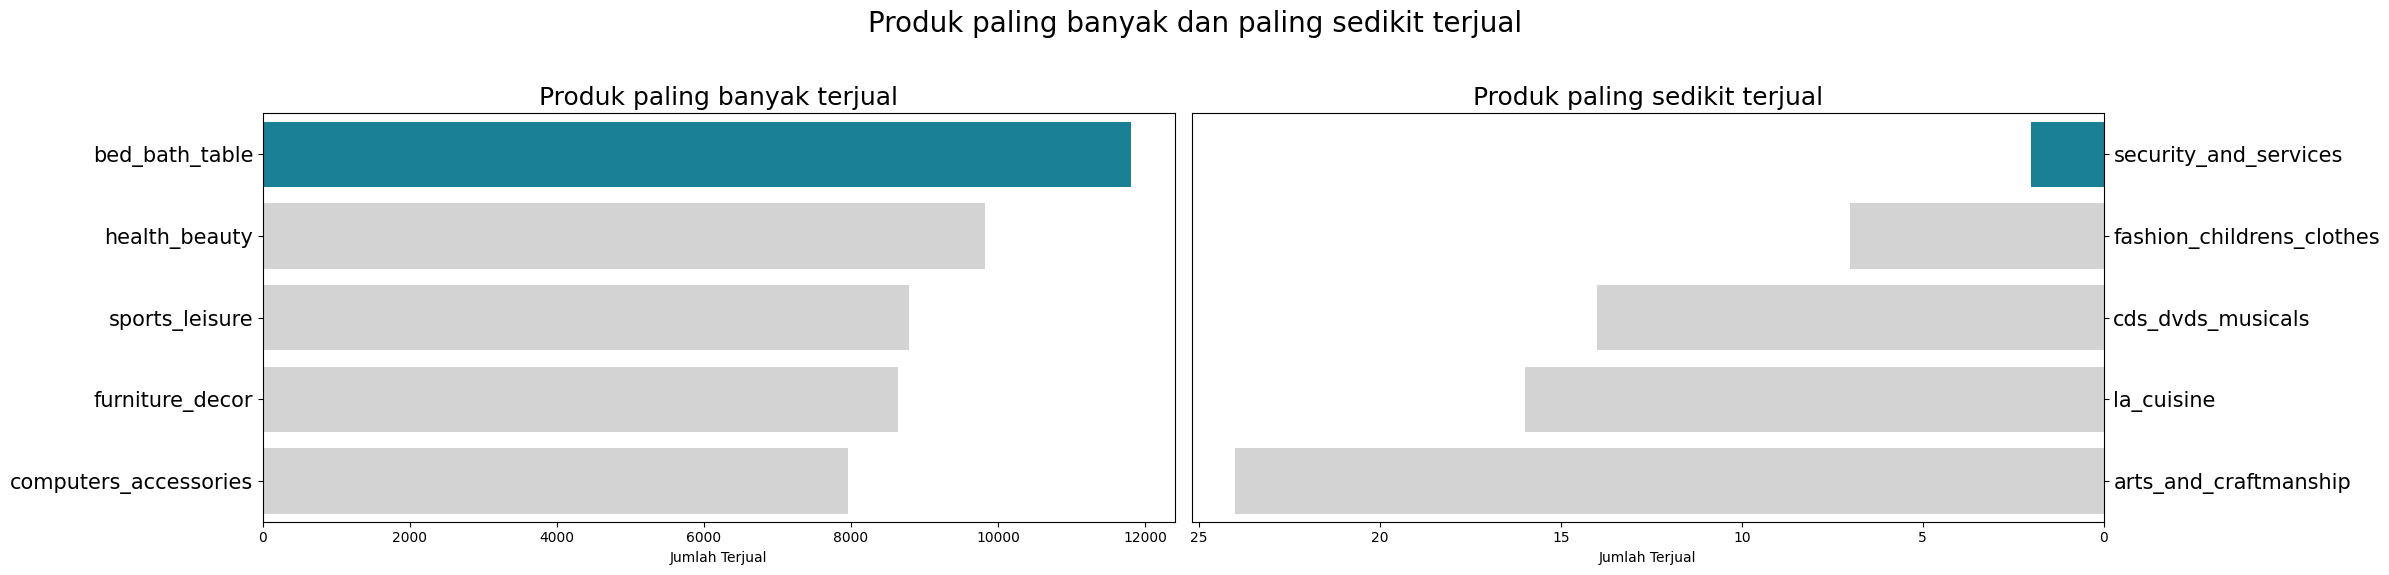

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Plot untuk produk terjual terbanyak
sns.barplot(
    x="jumlah_terjual", y="product_category_name_english",
    data=produk_terjual.head(5), palette=colors, ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel("Jumlah Terjual")
ax[0].set_title("Produk paling banyak terjual", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

# Plot untuk produk terjual paling sedikit
least_sold_products = produk_terjual.sort_values(by="jumlah_terjual", ascending=True).head(5)
sns.barplot(
    x="jumlah_terjual", y="product_category_name_english",
    data=least_sold_products, palette=colors, ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel("Jumlah Terjual")
ax[1].set_title("Produk paling sedikit terjual", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

plt.suptitle("Produk paling banyak dan paling sedikit terjual", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Menyesuaikan layout agar judul tidak tumpang tindih
plt.show()

### Pertanyaan 2: Bagaimana perkembangan penjualan platform E-Commerce sepanjang waktu?

In [72]:
# Mengonversi order_approved_at ke dalam format datetime jika belum dalam format tersebut
all_data['order_approved_at'] = pd.to_datetime(all_data['order_approved_at'])

# Menghitung jumlah order per bulan-tahun
all_data['month_revenue_years'] = all_data['order_approved_at'].dt.to_period('M')
monthly_orders = all_data.groupby('month_revenue_years')['order_id'].count().reset_index().rename(columns={'order_id': 'count_sold_product'})

print(monthly_orders)

# Ekstrak tahun dari kolom 'month_revenue_years'
monthly_orders['year'] = monthly_orders['month_revenue_years'].dt.year

# Menghitung jumlah order per tahun
yearly_orders = monthly_orders.groupby('year')['count_sold_product'].sum().reset_index()

# Tampilkan data jumlah order per tahun
print(yearly_orders)

   month_revenue_years  count_sold_product
0              2016-09                   3
1              2016-10                 398
2              2016-12                   1
3              2017-01                 984
4              2017-02                2104
5              2017-03                3263
6              2017-04                2845
7              2017-05                4471
8              2017-06                3863
9              2017-07                4887
10             2017-08                5286
11             2017-09                5211
12             2017-10                5630
13             2017-11                9017
14             2017-12                6846
15             2018-01                8541
16             2018-02                8041
17             2018-03                8705
18             2018-04                8075
19             2018-05                8497
20             2018-06                7391
21             2018-07                7234
22         

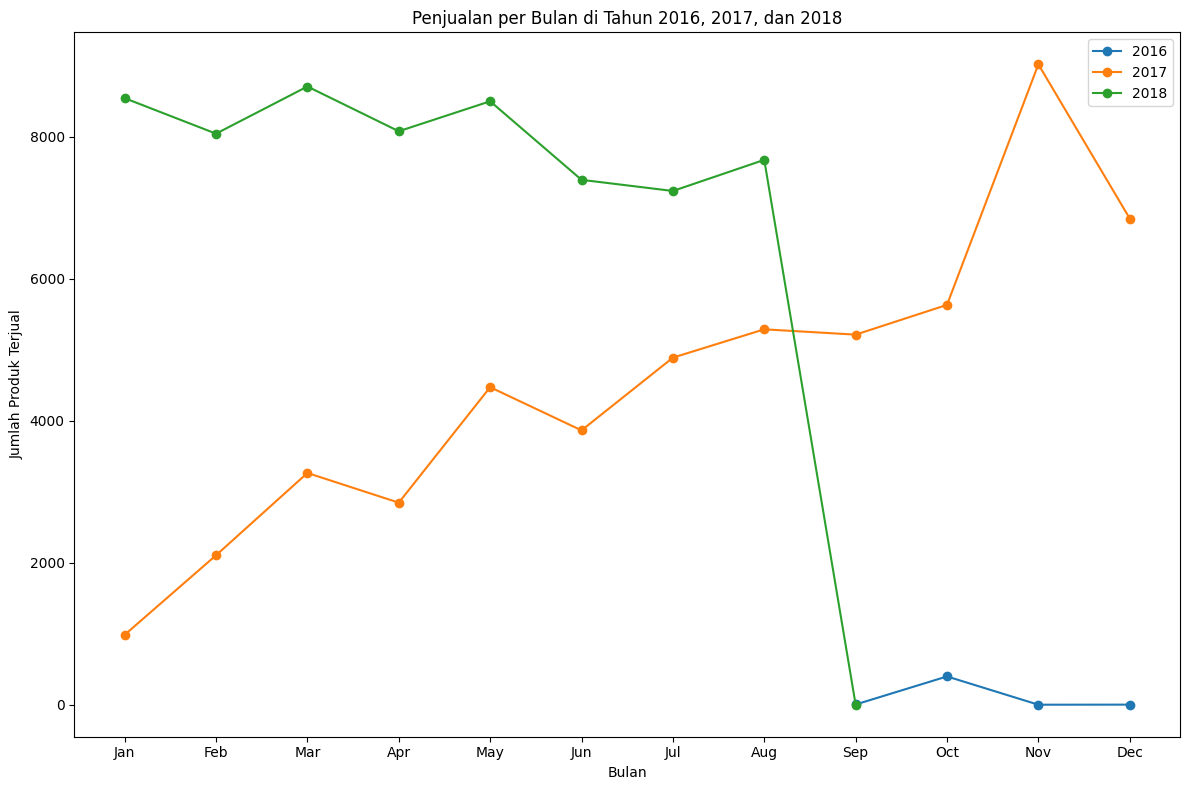

In [73]:
# Konversi tipe data period menjadi datetime
monthly_orders['month_revenue_years'] = monthly_orders['month_revenue_years'].dt.to_timestamp()

# Filter data untuk tahun 2016, 2017, dan 2018
df_2016 = monthly_orders[monthly_orders['month_revenue_years'].dt.year == 2016]
df_2017 = monthly_orders[monthly_orders['month_revenue_years'].dt.year == 2017]
df_2018 = monthly_orders[monthly_orders['month_revenue_years'].dt.year == 2018]

# Pisahkan data per tahun menjadi data perbulan
df_2016 = df_2016.set_index('month_revenue_years').resample('M').sum()
df_2017 = df_2017.set_index('month_revenue_years').resample('M').sum()
df_2018 = df_2018.set_index('month_revenue_years').resample('M').sum()

# Plot grafik garis untuk tahun 2016, 2017, dan 2018
plt.figure(figsize=(12, 8))

plt.plot(df_2016.index.month, df_2016['count_sold_product'], marker='o', label='2016')
plt.plot(df_2017.index.month, df_2017['count_sold_product'], marker='o', label='2017')
plt.plot(df_2018.index.month, df_2018['count_sold_product'], marker='o', label='2018')

plt.xlabel('Bulan')
plt.ylabel('Jumlah Produk Terjual')
plt.title('Penjualan per Bulan di Tahun 2016, 2017, dan 2018')
plt.legend()
plt.xticks(range(1, 13), labels=[calendar.month_abbr[i] for i in range(1, 13)])  # Menggunakan nama bulan
plt.tight_layout()

plt.show()

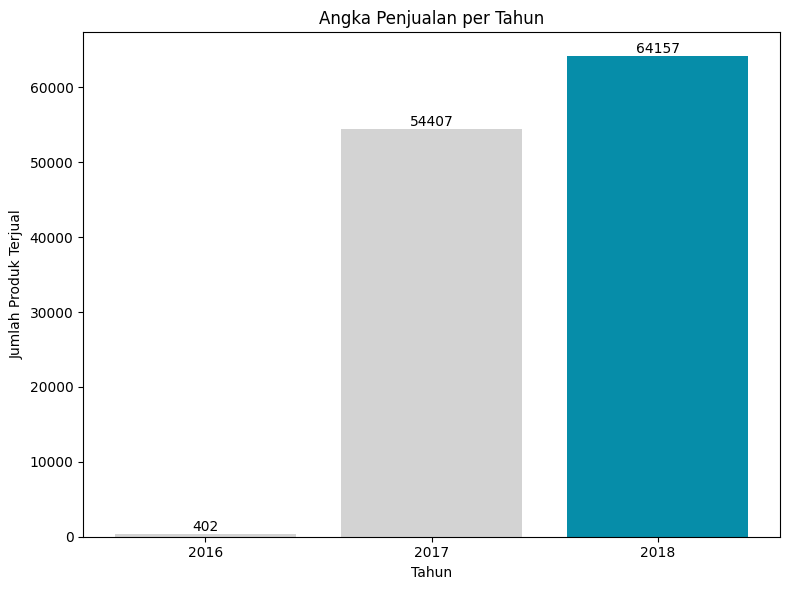

In [74]:
plt.figure(figsize=(8, 6))
bars = plt.bar(yearly_orders['year'], yearly_orders['count_sold_product'], color=["#D3D3D3", "#D3D3D3", "#068DA9"])
plt.xlabel('Tahun')
plt.ylabel('Jumlah Produk Terjual')
plt.title('Angka Penjualan per Tahun')
plt.xticks(yearly_orders['year'])

# Menambahkan label angka di atas setiap bar
for bar, label in zip(bars, yearly_orders['count_sold_product']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), label,
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Pertanyaan 3 : Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

In [75]:
# Mengonversi order_approved_at ke dalam format datetime jika belum dalam format tersebut
all_data['order_approved_at'] = pd.to_datetime(all_data['order_approved_at'])

# Menghitung total pengeluaran per bulan-tahun
all_data['month_revenue_years'] = all_data['order_approved_at'].dt.to_period('M')
monthly_spending = all_data.groupby('month_revenue_years')['payment_value'].sum().reset_index().rename(columns={'payment_value': 'total_spending'})

print(monthly_spending)

# Ekstrak tahun dari kolom 'month_revenue_years'
monthly_spending['year'] = monthly_spending['month_revenue_years'].dt.year

# Menghitung total pengeluaran per tahun
yearly_spending = monthly_spending.groupby('year')['total_spending'].sum().reset_index()

# Tampilkan data total pengeluaran per tahun
print(yearly_spending)

   month_revenue_years  total_spending
0              2016-09            0.00
1              2016-10        75985.54
2              2016-12           19.62
3              2017-01       182178.36
4              2017-02       350023.57
5              2017-03       547228.40
6              2017-04       506593.88
7              2017-05       736346.88
8              2017-06       620191.15
9              2017-07       739098.77
10             2017-08       882476.79
11             2017-09       927821.13
12             2017-10      1138730.07
13             2017-11      1588308.55
14             2017-12      1092932.59
15             2018-01      1406557.66
16             2018-02      1314882.87
17             2018-03      1500474.01
18             2018-04      1476502.25
19             2018-05      1545868.81
20             2018-06      1306785.03
21             2018-07      1334156.42
22             2018-08      1268960.54
23             2018-09          166.46
   year  total_spending
0

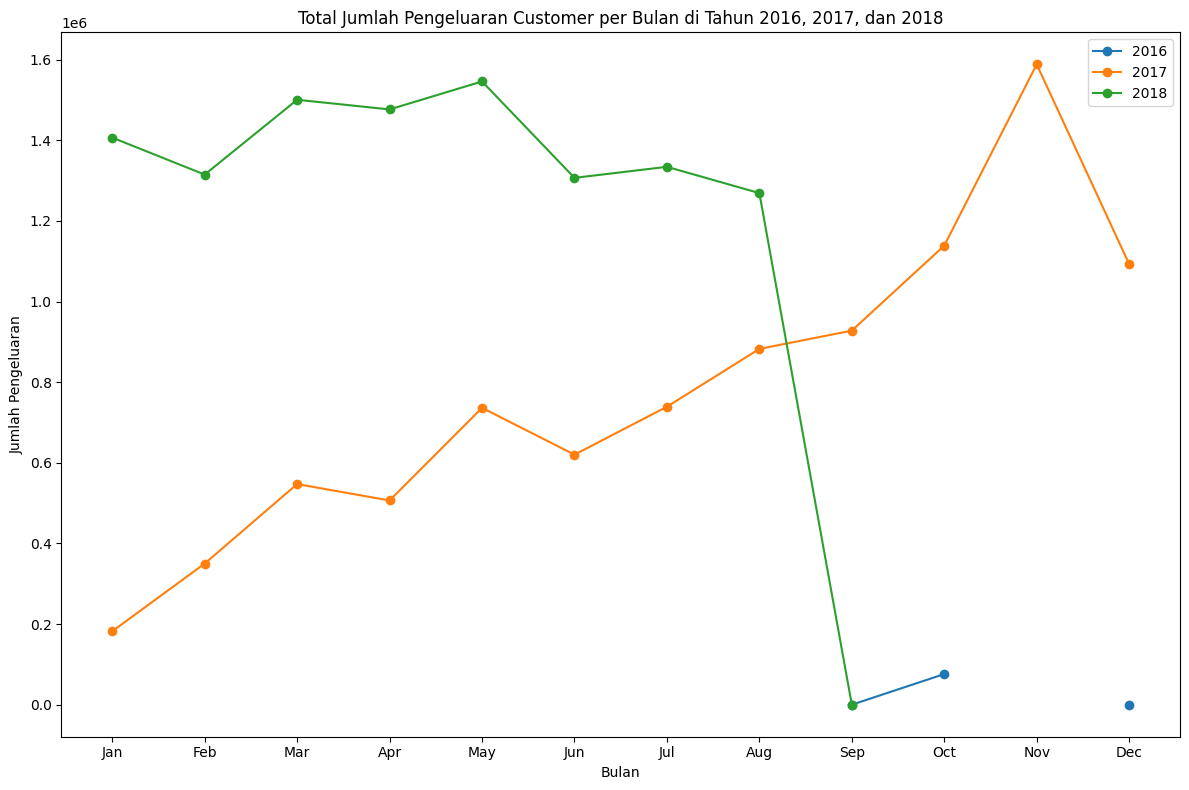

In [76]:
# Filter data untuk tahun 2016, 2017, dan 2018
df_2016_spending = monthly_spending[monthly_spending['month_revenue_years'].dt.year == 2016]
df_2017_spending = monthly_spending[monthly_spending['month_revenue_years'].dt.year == 2017]
df_2018_spending = monthly_spending[monthly_spending['month_revenue_years'].dt.year == 2018]

# Pisahkan data per tahun menjadi data perbulan
df_2016_spending = df_2016_spending.set_index('month_revenue_years').resample('M').sum()
df_2017_spending = df_2017_spending.set_index('month_revenue_years').resample('M').sum()
df_2018_spending = df_2018_spending.set_index('month_revenue_years').resample('M').sum()

# Plot grafik garis untuk tahun 2016, 2017, dan 2018
plt.figure(figsize=(12, 8))

plt.plot(df_2016_spending.index.month, df_2016_spending['total_spending'], marker='o', label='2016')
plt.plot(df_2017_spending.index.month, df_2017_spending['total_spending'], marker='o', label='2017')
plt.plot(df_2018_spending.index.month, df_2018_spending['total_spending'], marker='o', label='2018')

plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengeluaran')
plt.title('Total Jumlah Pengeluaran Customer per Bulan di Tahun 2016, 2017, dan 2018')
plt.legend()
plt.xticks(range(1, 13), labels=[calendar.month_abbr[i] for i in range(1, 13)])  # Menggunakan nama bulan
plt.tight_layout()

plt.show()

### Pertanyaan 4 : Bagaimana tingkat kepuasan pelanggan terhadap layanan E-Commerce?

C:\Users\ivanc\AppData\Local\Temp\ipykernel_9980\408533216.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_scores.index,


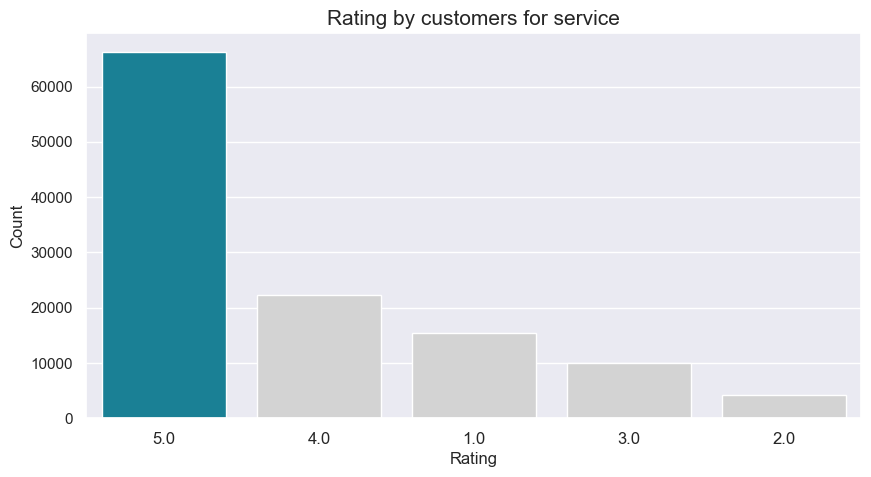

In [77]:
# Menghitung nilai review_scores dan nilai paling umum
review_scores = all_data['review_score'].value_counts().sort_values(ascending=False)
most_common_score = review_scores.idxmax()

# Pengaturan gaya plot
sns.set(style="darkgrid")

# Membuat plot menggunakan seaborn
plt.figure(figsize=(10, 5))
palette_colors = ["#068DA9" if score == most_common_score else "#D3D3D3" for score in review_scores.index]
sns.barplot(x=review_scores.index, 
            y=review_scores.values, 
            order=review_scores.index,
            palette=palette_colors)

# Menambahkan judul dan label sumbu
plt.title("Rating by customers for service", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(fontsize=12)
plt.show()

### Pertanyaan 5 : Bagaimana profil demografis dan wilayah yang memiliki pelanggan terbanyak?

C:\Users\ivanc\AppData\Local\Temp\ipykernel_9980\2115885169.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_state', y='customer_count', data=customer_count_by_state, palette=palette)


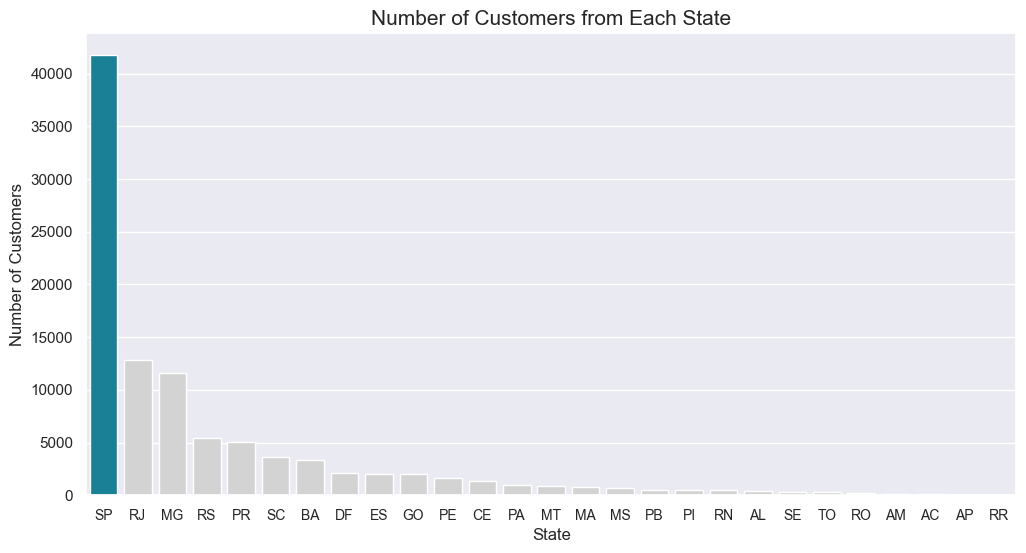

In [78]:
# Menghitung jumlah unik customer_id berdasarkan customer_state
customer_count_by_state = all_data.groupby(by="customer_state").customer_id.nunique().reset_index()
customer_count_by_state.rename(columns={"customer_id": "customer_count"}, inplace=True)

# Plot
plt.figure(figsize=(12, 6))

# State dengan jumlah customer terbanyak
state_with_most_customers = customer_count_by_state.loc[customer_count_by_state['customer_count'].idxmax(), 'customer_state']

# Mengurutkan DataFrame berdasarkan customer_count
customer_count_by_state = customer_count_by_state.sort_values(by='customer_count', ascending=False)

# Membuat palet warna
palette = ["#068DA9" if state == state_with_most_customers else "#D3D3D3" for state in customer_count_by_state['customer_state']]

# Membuat bar plot
sns.barplot(x='customer_state', y='customer_count', data=customer_count_by_state, palette=palette)

# Konfigurasi label dan judul plot
plt.title("Number of Customers from Each State", fontsize=15)
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.xticks(fontsize=10)
plt.show()

C:\Users\ivanc\AppData\Local\Temp\ipykernel_9980\4238547011.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_count_by_city.index, y=customer_count_by_city.values, palette=palette)


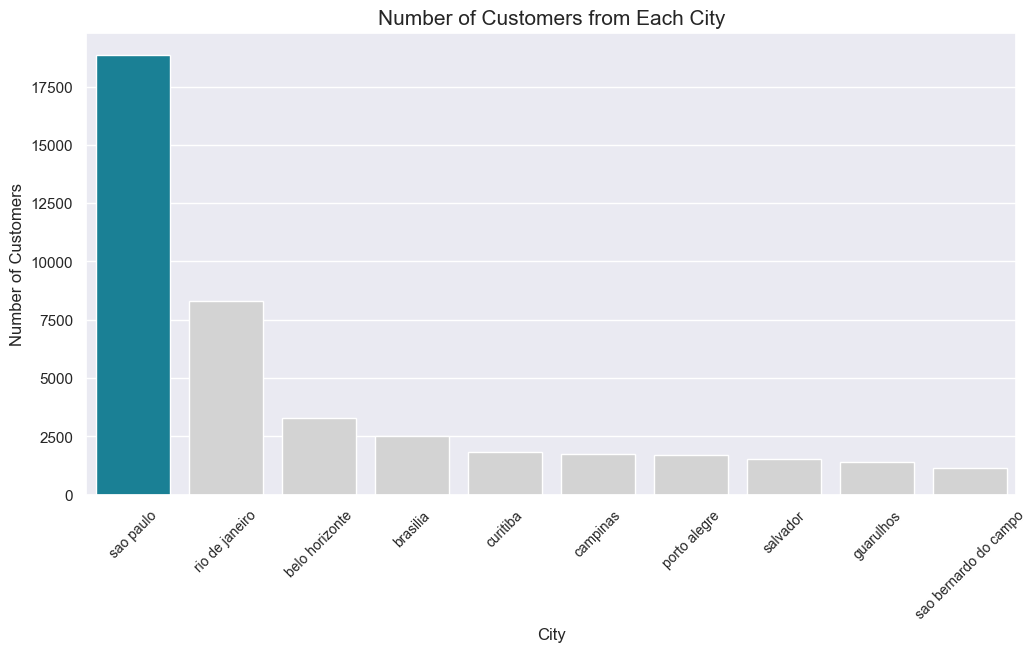

In [79]:
# Menghitung jumlah customer per kota
customer_count_by_city = all_data['customer_city'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))

# Kota dengan jumlah customer terbanyak
most_common_city = customer_count_by_city.idxmax()

# Mengurutkan DataFrame berdasarkan jumlah customer
customer_count_by_city = customer_count_by_city.sort_values(ascending=False)

# Membuat palet warna
palette = ["#068DA9" if city == most_common_city else "#D3D3D3" for city in customer_count_by_city.index]

# Membuat bar plot
sns.barplot(x=customer_count_by_city.index, y=customer_count_by_city.values, palette=palette)

# Konfigurasi label dan judul plot
plt.title("Number of Customers from Each City", fontsize=15)
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45, fontsize=10)
plt.show()

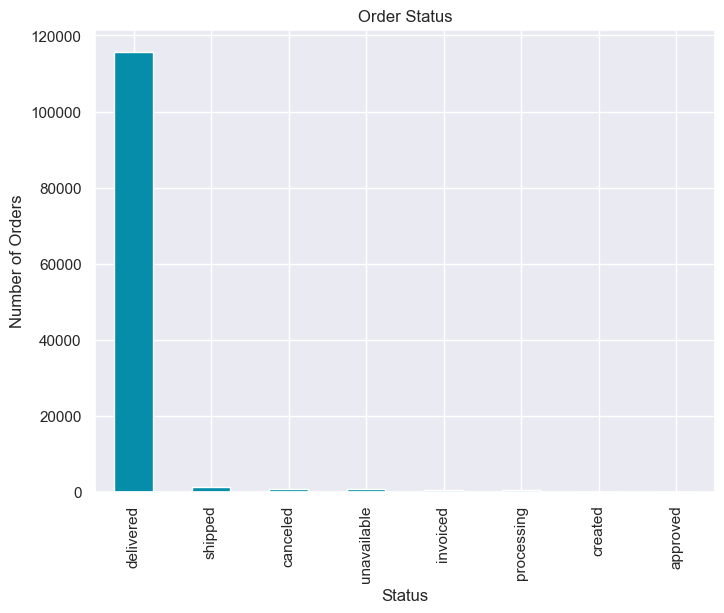

In [80]:
order_status_counts = all_data['order_status'].value_counts()

plt.figure(figsize=(8, 6))
order_status_counts.plot(kind='bar', color='#068DA9')
plt.title('Order Status')
plt.xlabel('Status')
plt.ylabel('Number of Orders')
plt.show()

Pada hasil diatas berdasarkan City, kota sao paulo memiliki data pelanggan terbanyak. oleh karena itu akan kita cari pembuktiannya melalui merge dengan dataframe geolocation_df dengan customer_df

In [81]:
other_state_geolocation = geolocation_df.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = geolocation_df.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [82]:
# Mengelompokkan data dan mengambil median geolocation_lat dan geolocation_lng
geolocation_filter = geolocation_df.groupby(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'])[['geolocation_lat', 'geolocation_lng']].median().reset_index()

# Melakukan penggabungan dengan menggunakan DataFrame yang berbeda (sebutannya mungkin max_state atau geolocation_silver, jadi disesuaikan dengan DataFrame yang dimaksud)
geolocation_filter = geolocation_filter.merge(max_state, on=['geolocation_zip_code_prefix', 'geolocation_state'], how='inner')

In [83]:
customers_geolocation = customers_df.merge(geolocation_filter,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')
customers_geolocation.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,4.0,no comment,no comment,2017-05-26,2017-05-30 22:34:40,14409,franca,SP,-20.50207,-47.396822
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,Active,95261f608a64bbbe760a212b4d48a4ee,delivered,2018-06-15 20:07:13,2018-06-15 20:41:11,...,5.0,super recomendo,no comment,2018-06-22,2018-06-26 19:17:40,14409,franca,SP,-20.50207,-47.396822
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,Active,9444fa2ab50a3f5af63b48be297eda24,delivered,2017-09-09 15:40:00,2017-09-09 15:50:24,...,5.0,no comment,no comment,2017-09-19,2017-09-20 03:47:39,14409,franca,SP,-20.50207,-47.396822
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,Active,dceb8e88274c6f42a88a76ed979eb817,delivered,2018-03-26 12:04:55,2018-03-26 12:15:37,...,5.0,no comment,no comment,2018-03-29,2018-04-11 20:07:14,14409,franca,SP,-20.50207,-47.396822
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,Active,6ee1cea1b2edcc713f83ebfbccbc57f9,delivered,2018-07-29 20:39:20,2018-07-29 20:55:21,...,5.0,no comment,no comment,2018-08-04,2018-08-04 23:20:25,14409,franca,SP,-20.50207,-47.396822


In [84]:
customers_geolocation.to_csv(os.path.join(".", "data/geolocation.csv"), index=False)

In [85]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='red')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

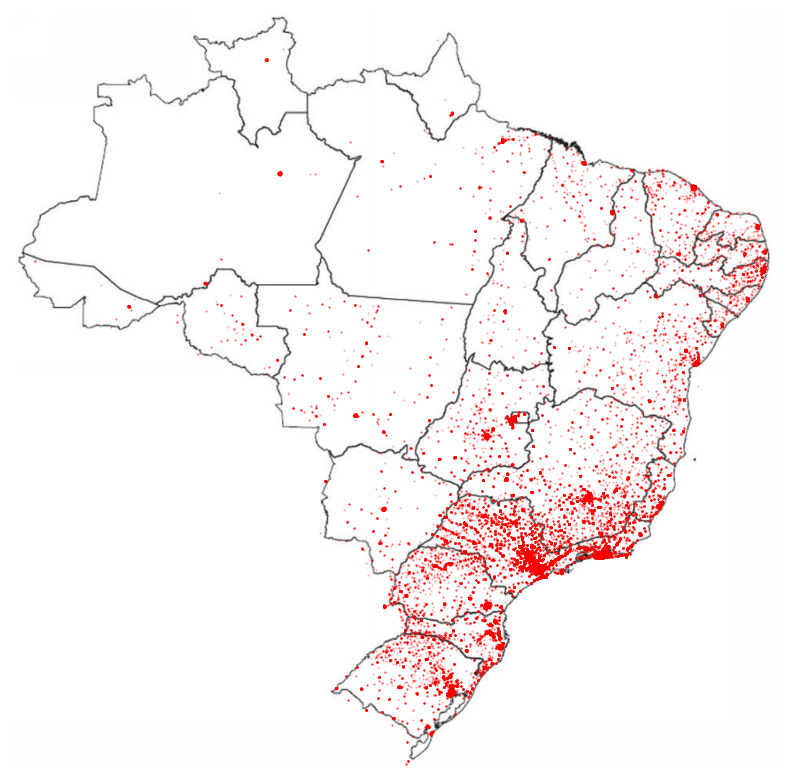

In [86]:
plot_brazil_map(customers_geolocation.drop_duplicates(subset='customer_unique_id'))

## Conclusion

- Produk apa yang paling laris dan paling sedikit terjual?
  > Berdasarkan hasil pemrosesan data dan data visualisasi, ditemukan bahwa pelanggan lebih sering membeli produk bed_bath_table dengan total sebesar 11814 penjualan dan produk yang tidak banyak dibeli pelanggan adalah produk security_and_services dengan total sebesar 2 penjualan
- Bagaimana perkembangan penjualan platform E-Commerce sepanjang waktu?
  > Berdasarkan data dan hasil yang telah kami kelola, untuk hasil penjualan di 2016 pada bulan september - desember sebanyak 402 penjualan. Untuk tahun berikutnya di 2017 pada bulan januari - desember mengalami peningkatan dengan total sebesar 54407 penjualan, dan di tahun 2018 pada bulan januari - september memiliki peningkatan dengan total sebesar 64157 penjualan. Ini membuktikan dari tahun ke tahun performa layanan E-Commerce mengalami peningkatan.
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?
  > Berdasarkan hasil visualisasi, saya akan mengambil kesimpulan dari data tahun 2017 dan 2018 karena datanya lebih lengkap.
  > 
  > Untuk tahun 2017, penjualan dari awal bulan januari - desember mengalami peningkatan yang konsisten hingga puncak penghasilan terbanyak terjadi pada akhir tahun yaitu di sekitar bulan oktober hingga desember meskipun terdapat sedikit penurunan dari bulan november ke desember 2017 akan tetapi dibulan tersebut merupakan penjualan tertinggi dibanding bulan - bulan sebelumnya.
  
  > Dan tahun 2018, meskipun dataset yang kami terima hanya dari data dari bulan januari - agustus (Bulan september tidak kami hitung karena data yang kami terima hanya sedikit yang dimana tidak merepresentasikan data yang sebenarnya). Berdasarkan data di bulan januari sampai agustus mengalami peningkatan dari tahun sebelumnya. dan tidak menutup kemungkinan akan mengalami peningkatan yang serupa untuk bulan september - desember.
- Bagaimana tingkat kepuasan pelanggan terhadap layanan E-Commerce?
  >Berdasarkan hasil visualisasi, dapat disimpulkan secara keseluruhan layanan yang diberikan memuaskan dilihat dari rasio rating 5 adalah yang tertinggi pada visualisasi tersebut, diikuti dengan rating 4 untuk urutan kedua.
- Bagaimana profil demografis dan wilayah yang memiliki pelanggan terbanyak?
  > Berdasarkan grafik yang telah dibuat, pelanggan terbanyak ada dibagian tenggara dan selatan. dimana diketahui banyaknya penjualan dan pelanggan berasal dari kota - kota ibukota, seperti sao paulo, 
rio de janeir, 
belo horizon, dan lainnya